In [10]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
base_color = sns.color_palette()[0]

In [11]:
data_df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/Survey%20responses%20and%20patient%20demographics/pxdata.csv")
data_df.head(2)

,Survey,Composite,Perfect,Rate,Recommend,Date,Health,Mental,College,White,English,Service,Specialty,Unit,Sex,Source,Home,Age,Stay,Visit
0,1,88.888889,0,11,4,12/24/2015,5,5,Y,N,Y,M,39,10,F,D,Y,18-34,2+,0
1,2,50.000000,0,6,3,1/6/2015,4,4,N,Y,Y,S,39,20,F,D,Y,50-64,2+,0


In [12]:
data_df.isnull().sum()

Survey       0
Composite    0
Perfect      0
Rate         0
Recommend    0
Date         0
Health       0
Mental       0
College      0
White        0
English      0
Service      8
Specialty    0
Unit         0
Sex          0
Source       0
Home         0
Age          0
Stay         0
Visit        0
dtype: int64

In [13]:
data_df.dtypes

Survey         int64
Composite    float64
Perfect        int64
Rate           int64
Recommend      int64
Date          object
Health         int64
Mental         int64
College       object
White         object
English       object
Service       object
Specialty      int64
Unit           int64
Sex           object
Source        object
Home          object
Age           object
Stay          object
Visit          int64
dtype: object

In [14]:
data_df.nunique()

Survey       950
Composite    111
Perfect        2
Rate          11
Recommend      4
Date         338
Health         5
Mental         5
College        2
White          2
English        2
Service        3
Specialty      7
Unit          15
Sex            2
Source         2
Home           3
Age            6
Stay           4
Visit          2
dtype: int64

In [15]:
data_df["Perfect"].value_counts()

0    796
1    154
Name: Perfect, dtype: int64

In [16]:
data_df["Rate"].value_counts()

11    462
10    216
9     148
8      50
6      23
7      19
5      11
4       9
1       8
2       2
3       2
Name: Rate, dtype: int64

In [17]:
data_df["Recommend"].value_counts()

4    728
3    180
2     25
1     17
Name: Recommend, dtype: int64

In [18]:
data_df["Health"].value_counts()

4    314
3    282
5    176
2    140
1     38
Name: Health, dtype: int64

In [19]:
data_df["Mental"].value_counts()

5    365
4    318
3    197
2     63
1      7
Name: Mental, dtype: int64

In [20]:
data_df["College"].value_counts()

Y    626
N    324
Name: College, dtype: int64

In [21]:
data_df["White"].value_counts()

Y    857
N     93
Name: White, dtype: int64

In [22]:
data_df["English"].value_counts()

Y    865
N     85
Name: English, dtype: int64

In [23]:
data_df["Service"].value_counts()

M    623
S    237
O     82
Name: Service, dtype: int64

In [24]:
data_df["Specialty"].value_counts()

1     540
39    221
2     117
8      61
15      6
54      3
5       2
Name: Specialty, dtype: int64

In [25]:
data_df["Unit"].value_counts()

10    210
24    132
18    117
8      99
9      96
4      89
25     77
7      70
28     27
20     10
11     10
26      7
3       3
21      2
23      1
Name: Unit, dtype: int64

In [26]:
data_df['Source'].value_counts()

T    599
D    351
Name: Source, dtype: int64

In [27]:
data_df["Home"].value_counts()

Y    589
S    326
N     35
Name: Home, dtype: int64

In [28]:
data_df["Age"].unique()

array(['18-34', '50-64', '35-49', '65-79', '80+', '80-90'], dtype=object)

In [29]:
data_df["Stay"].unique()

array(['2+', '4+', '1', '8+'], dtype=object)

In [30]:
data_df["Visit"].unique()

array([0, 1])

In [31]:
cleaned_data = data_df.copy()

In [32]:
cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'])

In [33]:
cleaned_data.dtypes

Survey                int64
Composite           float64
Perfect               int64
Rate                  int64
Recommend             int64
Date         datetime64[ns]
Health                int64
Mental                int64
College              object
White                object
English              object
Service              object
Specialty             int64
Unit                  int64
Sex                  object
Source               object
Home                 object
Age                  object
Stay                 object
Visit                 int64
dtype: object

In [34]:
cleaned_data['Perfect'] = cleaned_data['Perfect'].apply(lambda x : True if x==1 else False)
cleaned_data['College'] = cleaned_data['College'].apply(lambda x : True if x=='Y' else False)
cleaned_data['White'] = cleaned_data['White'].apply(lambda x : True if x=='Y' else False)
cleaned_data['English'] = cleaned_data['English'].apply(lambda x : True if x=='Y' else False)

In [35]:
cleaned_data.dtypes

Survey                int64
Composite           float64
Perfect                bool
Rate                  int64
Recommend             int64
Date         datetime64[ns]
Health                int64
Mental                int64
College                bool
White                  bool
English                bool
Service              object
Specialty             int64
Unit                  int64
Sex                  object
Source               object
Home                 object
Age                  object
Stay                 object
Visit                 int64
dtype: object

In [36]:
cleaned_data['Stay'] = cleaned_data['Stay'].replace({'2+':'2-3', '4+': '4-7'})

In [37]:
cleaned_data["Stay"].unique()

array(['2-3', '4-7', '1', '8+'], dtype=object)

In [38]:
cleaned_data['Age'] = cleaned_data["Age"].apply(lambda x: '90+' if x=='80+' else x)

In [39]:
cleaned_data["Age"].unique

<bound method Series.unique of 0      18-34
1      50-64
2      18-34
3      35-49
4      18-34
       ...  
945    35-49
946    18-34
947    18-34
948    18-34
949    18-34
Name: Age, Length: 950, dtype: object>

In [40]:
from pandas.api.types import CategoricalDtype
age_cat = CategoricalDtype(['18-34', '35-49', '50-64', '65-79', '80-90', '90+'], ordered=True)
cleaned_data['Age'] = cleaned_data['Age'].astype(age_cat)

In [41]:
cleaned_data['Age'].dtype

CategoricalDtype(categories=['18-34', '35-49', '50-64', '65-79', '80-90', '90+'], ordered=True)

In [42]:
stay_cat = CategoricalDtype(['1', '2-3', '4-7', '8+'], ordered=True)
cleaned_data['Stay'] = cleaned_data['Stay'].astype(stay_cat)

In [43]:
cleaned_data.dtypes

Survey                int64
Composite           float64
Perfect                bool
Rate                  int64
Recommend             int64
Date         datetime64[ns]
Health                int64
Mental                int64
College                bool
White                  bool
English                bool
Service              object
Specialty             int64
Unit                  int64
Sex                  object
Source               object
Home                 object
Age                category
Stay               category
Visit                 int64
dtype: object

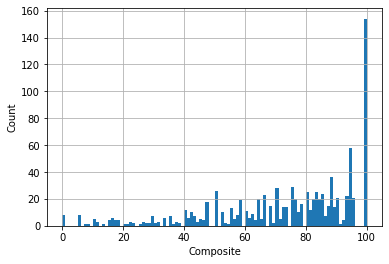

In [44]:
cleaned_data['Composite'].hist(bins=100)
plt.xlabel('Composite')
plt.ylabel('Count')
plt.show()

In [45]:
cleaned_data['Month'] = cleaned_data['Date'].apply(lambda x : x.strftime("%B"))
cleaned_data['Day_of_Week'] = cleaned_data['Date'].apply(lambda x: x.strftime("%A"))

In [46]:
m_cat = CategoricalDtype(['January', 'February', 'March', 'April', 'May', 'June', 'July', 
                          'August', 'September', 'October', 'November', 'December'], ordered=True)
d_w_cat = CategoricalDtype(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 
                            'Saturday', 'Sunday'], ordered=True)
cleaned_data['Month'] = cleaned_data['Month'].astype(m_cat)
cleaned_data['Day_of_Week'] = cleaned_data['Day_of_Week'].astype(d_w_cat)

In [47]:
cleaned_data["Month"].unique()

['December', 'January', 'August', 'May', 'October', ..., 'September', 'March', 'November', 'April', 'June']
Length: 12
Categories (12, object): ['January' < 'February' < 'March' < 'April' ... 'September' < 'October' < 'November' < 'December']

In [48]:
cleaned_data["Day_of_Week"].unique()

['Thursday', 'Tuesday', 'Saturday', 'Wednesday', 'Monday', 'Friday', 'Sunday']
Categories (7, object): ['Monday' < 'Tuesday' < 'Wednesday' < 'Thursday' < 'Friday' < 'Saturday' < 'Sunday']

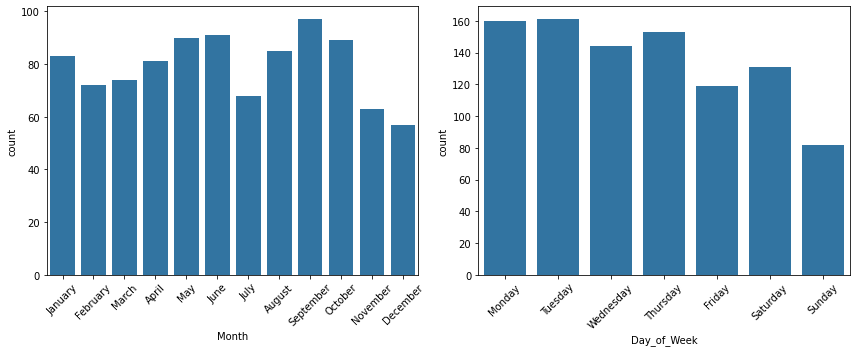

In [49]:
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ch1 = sns.countplot(x='Month', data=cleaned_data, ax=ax1, color=base_color)
ch1.set_xticklabels(labels = ch1.get_xticklabels(), rotation=45)
ch2 = sns.countplot(x='Day_of_Week', data=cleaned_data, ax=ax2, color=base_color)
ch2.set_xticklabels(labels = ch2.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


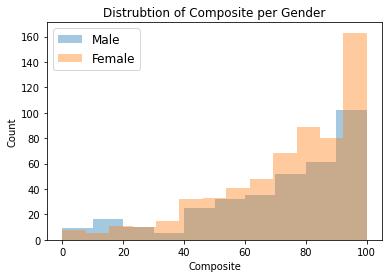

In [50]:
d_m = cleaned_data[cleaned_data['Sex']=='M']
sns.distplot(d_m['Composite'],kde=False, label='Male')
d_f = cleaned_data[cleaned_data['Sex']=='F']
sns.distplot(d_f['Composite'],kde=False, label='Female')
plt.legend(prop={'size': 12})
plt.title('Distrubtion of Composite per Gender')
plt.xlabel('Composite')
plt.ylabel('Count')
plt.show()

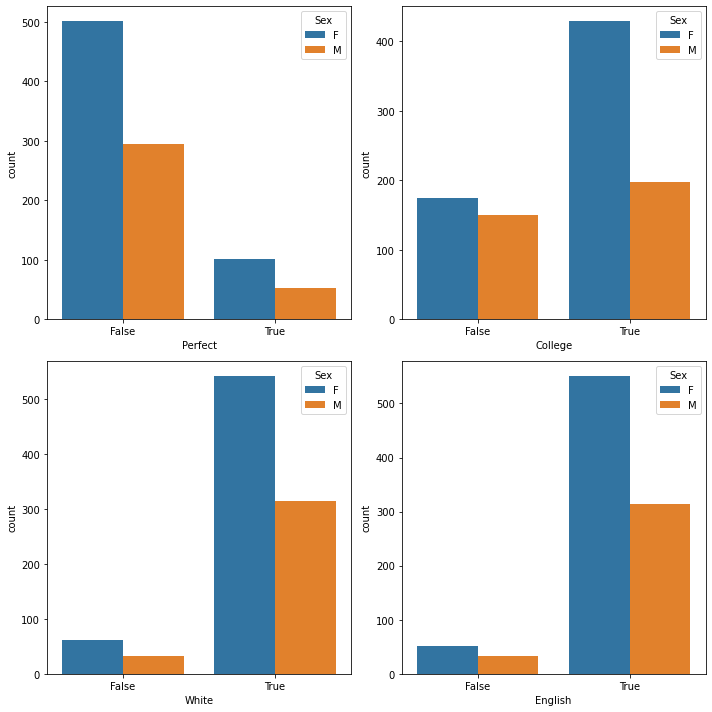

In [51]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
sns.countplot(x='Perfect', data=cleaned_data, ax=ax1, hue='Sex')
sns.countplot(x='College', data=cleaned_data, ax=ax2, hue='Sex')
sns.countplot(x='White', data=cleaned_data, ax=ax3, hue='Sex')
sns.countplot(x='English', data=cleaned_data, ax=ax4, hue='Sex')
plt.tight_layout()
plt.show()

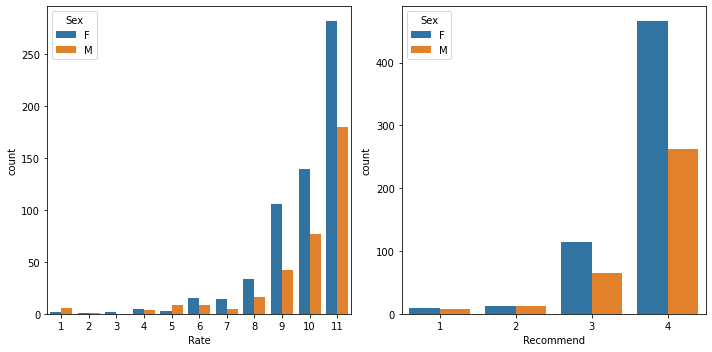

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


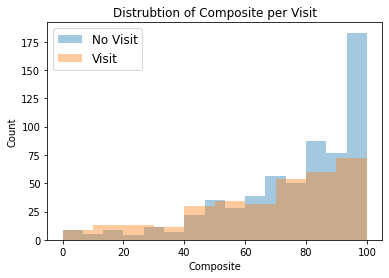

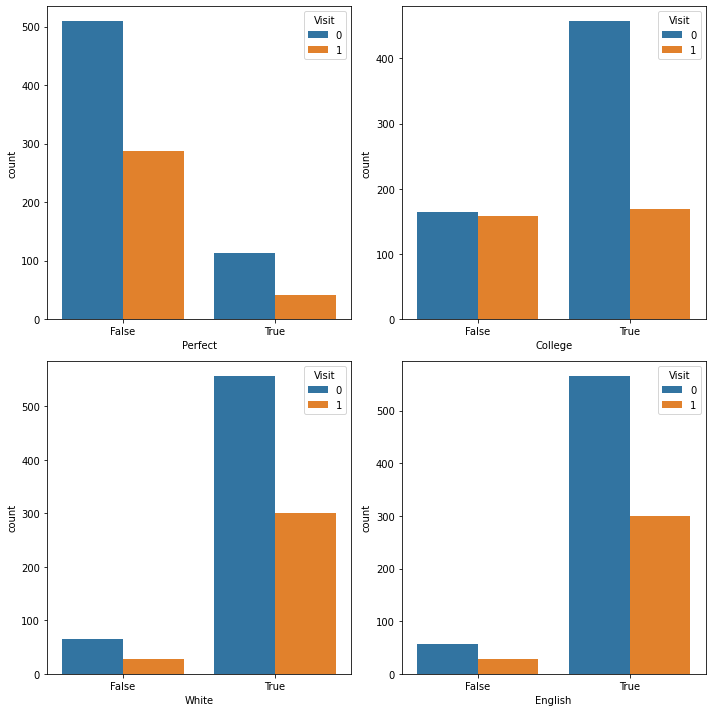

In [52]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.countplot(x='Rate', data=cleaned_data, ax=ax1, hue='Sex')
sns.countplot(x='Recommend', data=cleaned_data, ax=ax2, hue='Sex')
plt.tight_layout()
plt.show()

d_m = cleaned_data[cleaned_data['Visit']==0]
sns.distplot(d_m['Composite'],kde=False, label='No Visit')
d_f = cleaned_data[cleaned_data['Visit']==1]
sns.distplot(d_f['Composite'],kde=False, label='Visit')
plt.legend(prop={'size': 12})
plt.title('Distrubtion of Composite per Visit')
plt.xlabel('Composite')
plt.ylabel('Count')
plt.show()

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
sns.countplot(x='Perfect', data=cleaned_data, ax=ax1, hue='Visit')
sns.countplot(x='College', data=cleaned_data, ax=ax2, hue='Visit')
sns.countplot(x='White', data=cleaned_data, ax=ax3, hue='Visit')
sns.countplot(x='English', data=cleaned_data, ax=ax4, hue='Visit')
plt.tight_layout()
plt.show()

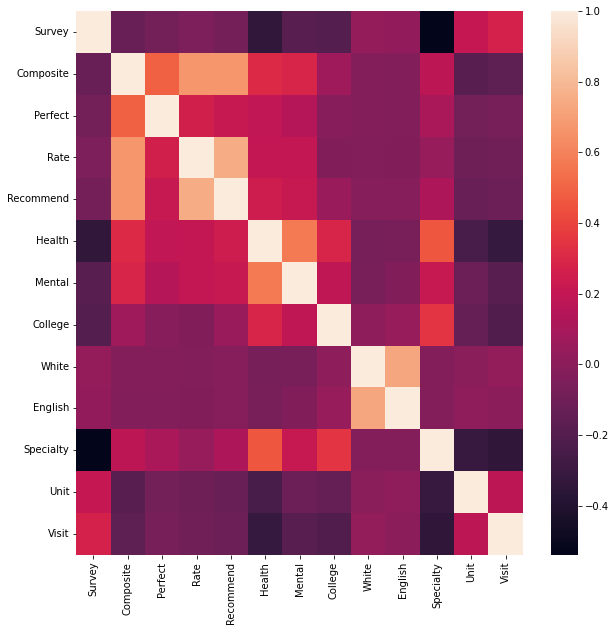

In [53]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
sns.heatmap(cleaned_data.corr(), ax=ax);

In [54]:
y = cleaned_data['Visit']
X = cleaned_data[[x for x in cleaned_data.columns if x not in ['Survey', 'Visit', 'Date']]]

In [55]:
X['White'] = X['White'].astype('int32')
X['College'] = X['College'].astype('int32')
X['English'] = X['English'].astype('int32')
X['Perfect'] = X['Perfect'].astype('int32')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [56]:
X['Sex'] = X['Sex'].replace({'F':0, 'M':1})

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
X['Source'] = X['Source'].replace({'D':1,'T':0})

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [58]:
X = pd.get_dummies(X, columns=['Service', 'Home', 'Specialty', 'Unit'])
X.columns

Index(['Composite', 'Perfect', 'Rate', 'Recommend', 'Health', 'Mental',
       'College', 'White', 'English', 'Sex', 'Source', 'Age', 'Stay', 'Month',
       'Day_of_Week', 'Service_M', 'Service_O', 'Service_S', 'Home_N',
       'Home_S', 'Home_Y', 'Specialty_1', 'Specialty_2', 'Specialty_5',
       'Specialty_8', 'Specialty_15', 'Specialty_39', 'Specialty_54', 'Unit_3',
       'Unit_4', 'Unit_7', 'Unit_8', 'Unit_9', 'Unit_10', 'Unit_11', 'Unit_18',
       'Unit_20', 'Unit_21', 'Unit_23', 'Unit_24', 'Unit_25', 'Unit_26',
       'Unit_28'],
      dtype='object')

In [59]:
X.drop(['Service_O', 'Home_Y', 'Specialty_1', 'Unit_3'], axis=1, inplace=True)

In [60]:
X['Month'] = X['Month'].replace({'January':0, 'February':1, 'March':2, 'April':3, 'May':4, 'June':5, 'July':6, 
                                 'August':7, 'September':8, 'October':9, 'November':10, 'December':11})
X['Day_of_Week'] = X['Day_of_Week'].replace({'Monday':0, 'Tuesday':1, 'Wednesday':2, 'Thursday':3, 'Friday':4, 
                                             'Saturday':5, 'Sunday':6})
X['Age'] = X['Age'].replace({'18-34':0, '35-49':1, '50-64':2, '65-79':3, '80-90':4, '90+':5})
X['Stay'] = X['Stay'].replace({'1':0, '2-3':1, '4-7':2, '8+':3})

In [61]:
X.dtypes

Composite       float64
Perfect           int32
Rate              int64
Recommend         int64
Health            int64
Mental            int64
College           int32
White             int32
English           int32
Sex               int64
Source            int64
Age               int64
Stay              int64
Month             int64
Day_of_Week       int64
Service_M         uint8
Service_S         uint8
Home_N            uint8
Home_S            uint8
Specialty_2       uint8
Specialty_5       uint8
Specialty_8       uint8
Specialty_15      uint8
Specialty_39      uint8
Specialty_54      uint8
Unit_4            uint8
Unit_7            uint8
Unit_8            uint8
Unit_9            uint8
Unit_10           uint8
Unit_11           uint8
Unit_18           uint8
Unit_20           uint8
Unit_21           uint8
Unit_23           uint8
Unit_24           uint8
Unit_25           uint8
Unit_26           uint8
Unit_28           uint8
dtype: object

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.7)
Performances=[]

In [63]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [64]:
model={'Model': 'DecisionTree'}
model['Accuracy'] = accuracy_score(y_test, dtc.predict(X_test))
model['Precision'] = precision_score(y_test, dtc.predict(X_test))
model['F1-Score'] = f1_score(y_test, dtc.predict(X_test))
Performances.append(model)
confusion_matrix(y_test, dtc.predict(X_test))

array([[135,  46],
       [ 54,  50]])

In [65]:
print(classification_report(y_test, dtc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73       181
           1       0.52      0.48      0.50       104

    accuracy                           0.65       285
   macro avg       0.62      0.61      0.61       285
weighted avg       0.64      0.65      0.65       285



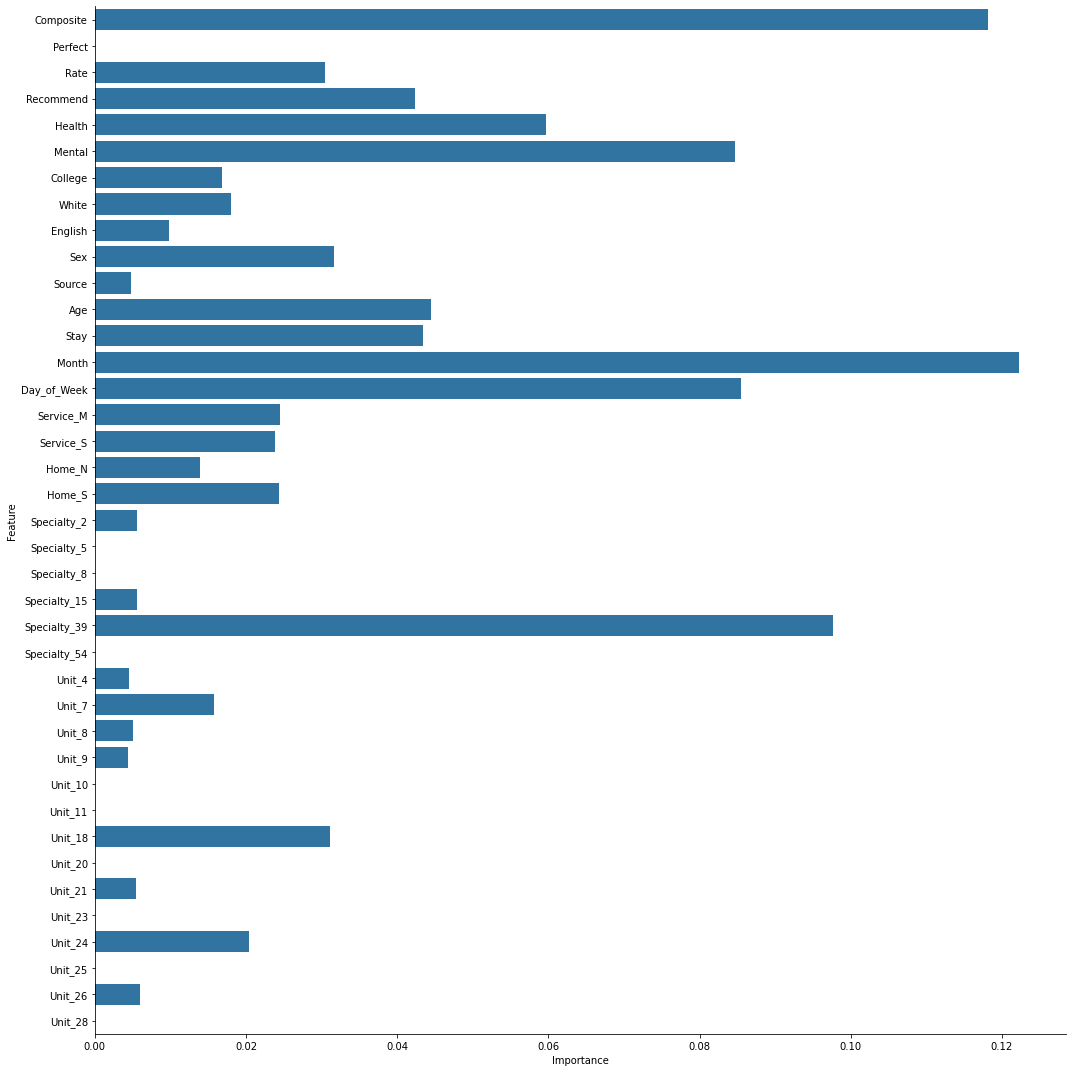

In [66]:
dtc_features = pd.DataFrame()
dtc_features['Feature'] = X_train.columns.tolist()
dtc_features['Importance'] = dtc.feature_importances_
sns.catplot(y='Feature', x='Importance', data=dtc_features, kind='bar', height=15, color=base_color)
plt.show()

In [67]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [68]:
model={'Model': 'RandomForest'}
model['Accuracy'] = accuracy_score(y_test, rfc.predict(X_test))
model['Precision'] = precision_score(y_test, rfc.predict(X_test))
model['F1-Score'] = f1_score(y_test, rfc.predict(X_test))
Performances.append(model)
confusion_matrix(y_test, rfc.predict(X_test))

array([[158,  23],
       [ 71,  33]])

In [69]:
print(classification_report(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.69      0.87      0.77       181
           1       0.59      0.32      0.41       104

    accuracy                           0.67       285
   macro avg       0.64      0.60      0.59       285
weighted avg       0.65      0.67      0.64       285



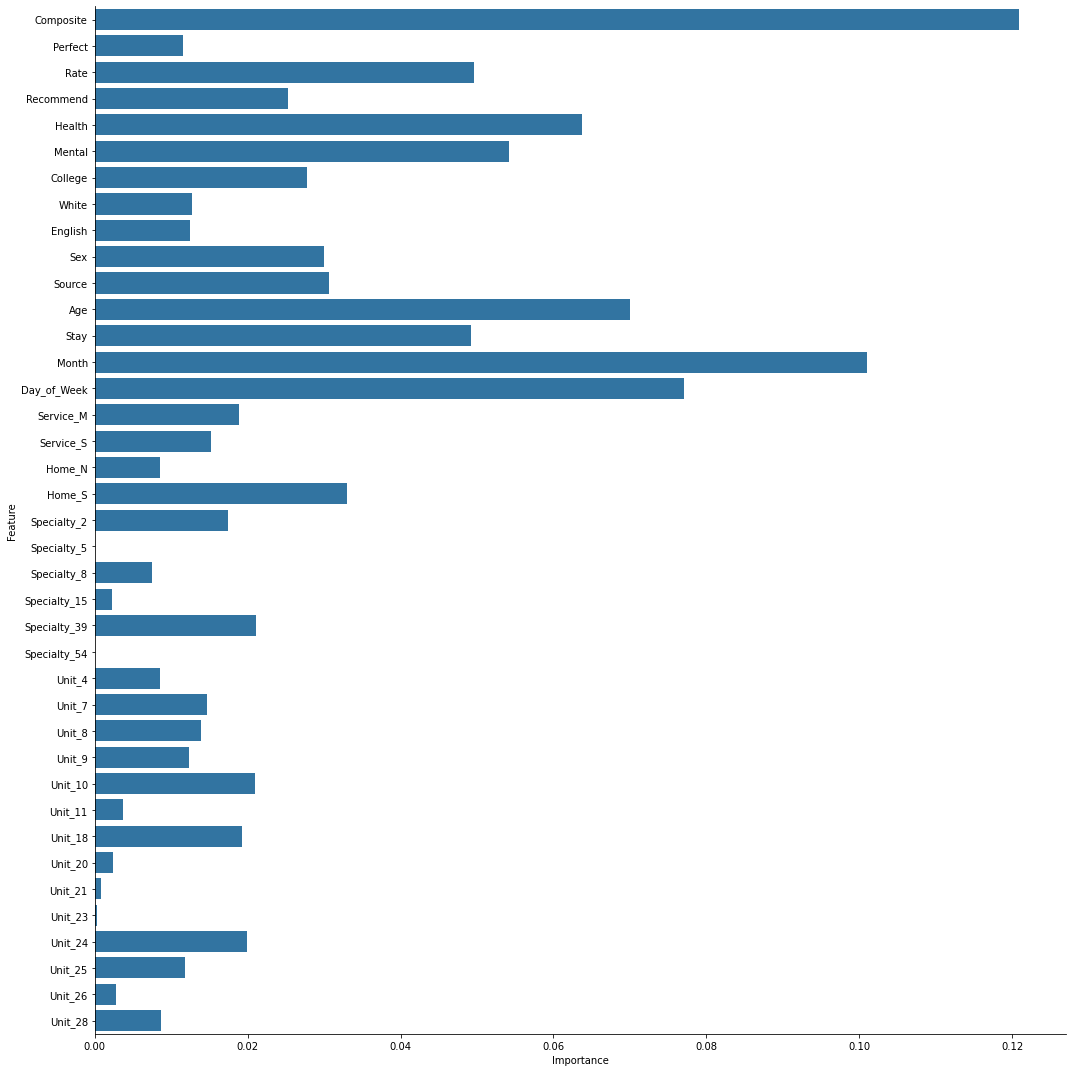

In [70]:
rfc_features = pd.DataFrame()
rfc_features['Feature'] = X_train.columns.tolist()
rfc_features['Importance'] = rfc.feature_importances_
sns.catplot(y='Feature', x='Importance', data=rfc_features, kind='bar', height=15, color=base_color)
plt.show()

In [71]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=100,random_state=0)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [72]:
model={'Model': 'XGBoost'}
model['Accuracy'] = accuracy_score(y_test, xgb.predict(X_test))
model['Precision'] = precision_score(y_test, xgb.predict(X_test))
model['F1-Score'] = f1_score(y_test, xgb.predict(X_test))
Performances.append(model)
confusion_matrix(y_test, xgb.predict(X_test))

array([[147,  34],
       [ 66,  38]])

In [73]:
print(classification_report(y_test, xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.69      0.81      0.75       181
           1       0.53      0.37      0.43       104

    accuracy                           0.65       285
   macro avg       0.61      0.59      0.59       285
weighted avg       0.63      0.65      0.63       285



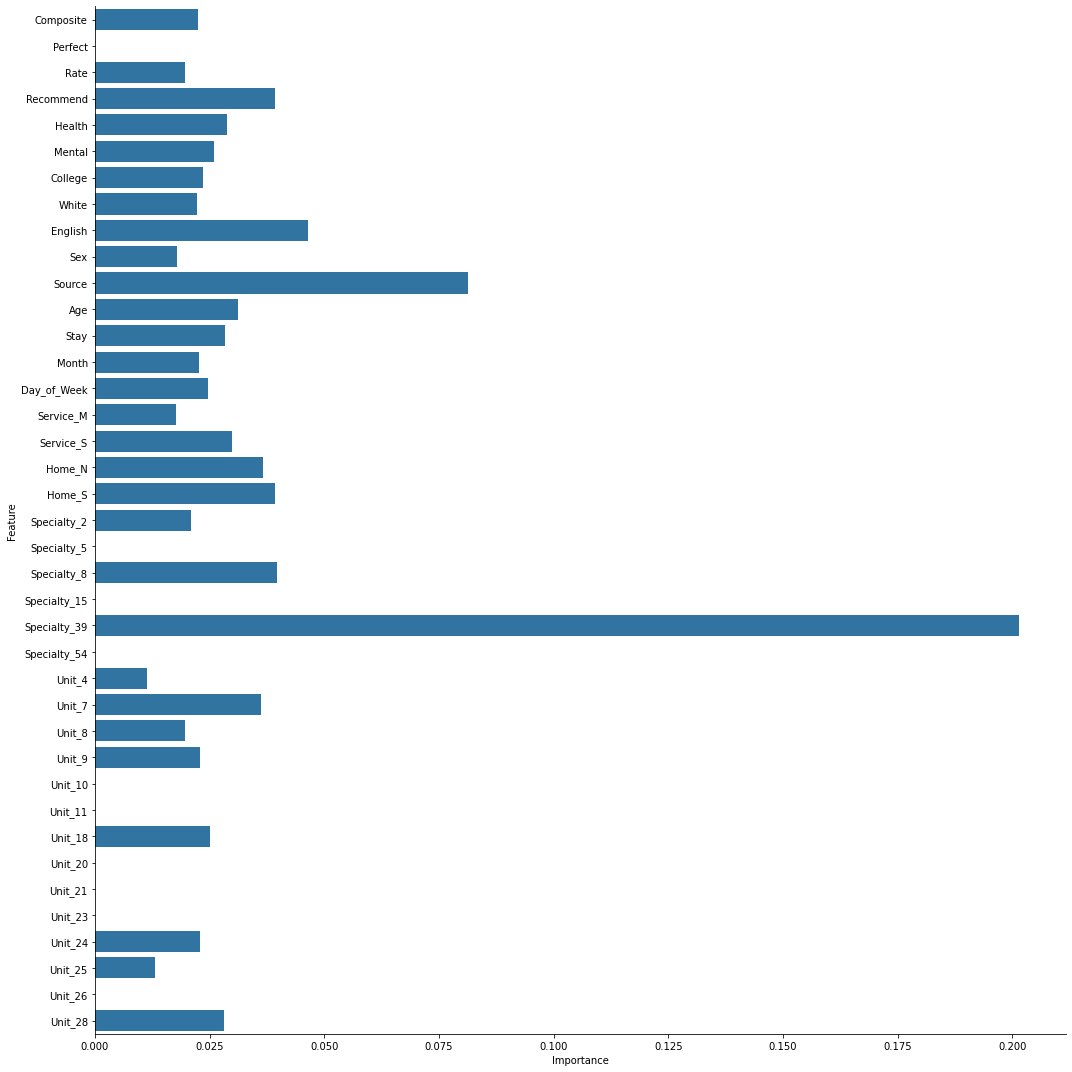

In [74]:
xgb_features = pd.DataFrame()
xgb_features['Feature'] = X_train.columns.tolist()
xgb_features['Importance'] = xgb.feature_importances_
sns.catplot(y='Feature', x='Importance', data=xgb_features, kind='bar', height=15, color=base_color)
plt.show()

In [75]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier(n_estimators=2500, random_state=0)
cb.fit(X_train, y_train)

Learning rate set to 0.003736
0:	learn: 0.6917711	total: 58.7ms	remaining: 2m 26s
1:	learn: 0.6903854	total: 60.6ms	remaining: 1m 15s
2:	learn: 0.6888079	total: 62.3ms	remaining: 51.8s
3:	learn: 0.6872447	total: 63.5ms	remaining: 39.6s
4:	learn: 0.6859197	total: 64.9ms	remaining: 32.4s
5:	learn: 0.6846411	total: 66.2ms	remaining: 27.5s
6:	learn: 0.6832971	total: 67.7ms	remaining: 24.1s
7:	learn: 0.6820667	total: 69.5ms	remaining: 21.7s
8:	learn: 0.6808668	total: 71.3ms	remaining: 19.7s
9:	learn: 0.6797281	total: 74.1ms	remaining: 18.4s
10:	learn: 0.6784889	total: 77.6ms	remaining: 17.5s
11:	learn: 0.6772166	total: 79.6ms	remaining: 16.5s
12:	learn: 0.6760061	total: 81.5ms	remaining: 15.6s
13:	learn: 0.6749684	total: 83.1ms	remaining: 14.8s
14:	learn: 0.6735399	total: 85ms	remaining: 14.1s
15:	learn: 0.6722908	total: 86.6ms	remaining: 13.4s
16:	learn: 0.6708767	total: 88.1ms	remaining: 12.9s
17:	learn: 0.6697056	total: 89.7ms	remaining: 12.4s
18:	learn: 0.6686781	total: 91.2ms	remaining

In [76]:
model={'Model': 'CatBoost'}
model['Accuracy'] = accuracy_score(y_test, cb.predict(X_test))
model['Precision'] = precision_score(y_test, cb.predict(X_test))
model['F1-Score'] = f1_score(y_test, cb.predict(X_test))
Performances.append(model)
confusion_matrix(y_test, cb.predict(X_test))

array([[160,  21],
       [ 69,  35]])

In [77]:
print(classification_report(y_test, cb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.70      0.88      0.78       181
           1       0.62      0.34      0.44       104

    accuracy                           0.68       285
   macro avg       0.66      0.61      0.61       285
weighted avg       0.67      0.68      0.66       285



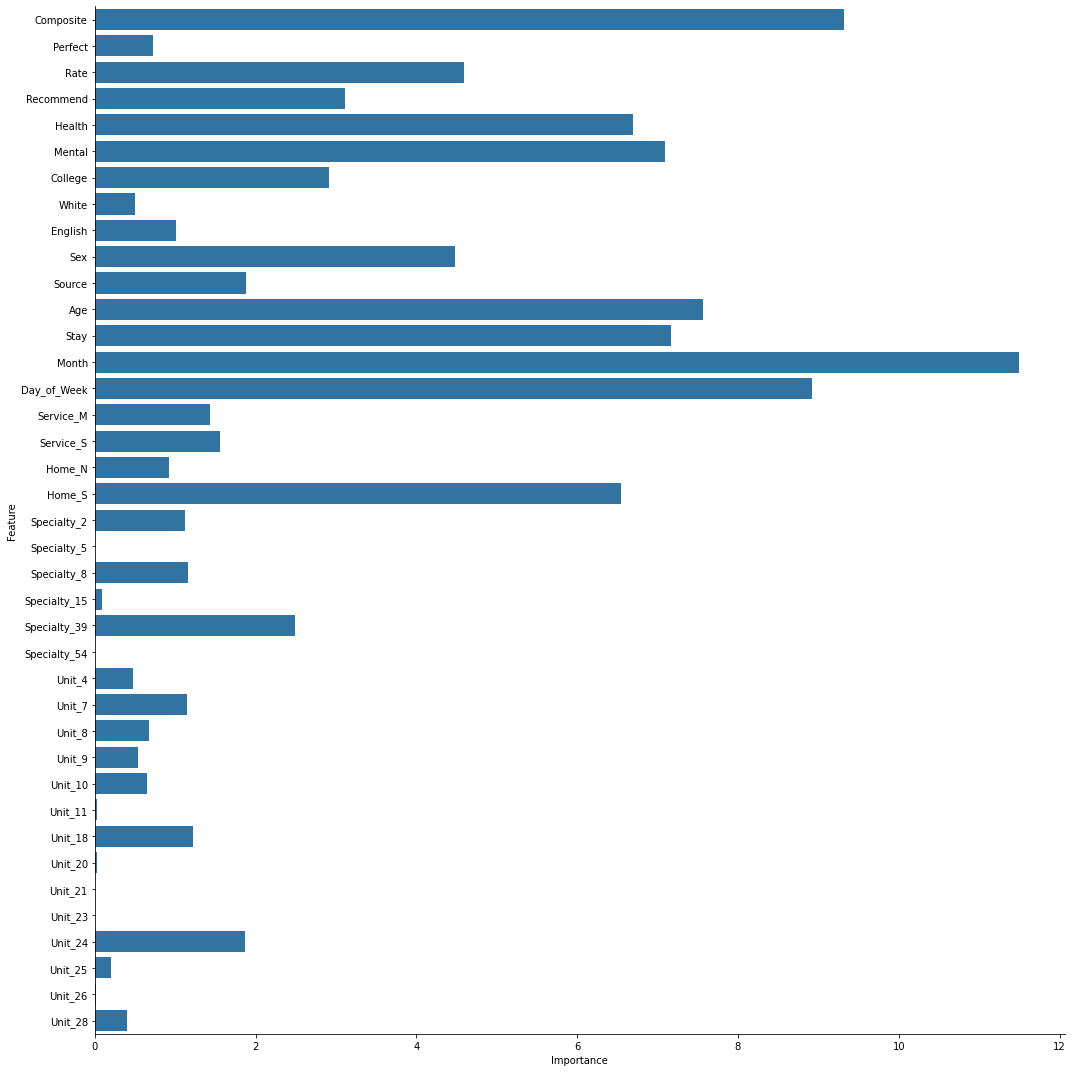

In [78]:
cb_features = pd.DataFrame()
cb_features['Feature'] = X_train.columns.tolist()
cb_features['Importance'] = cb.feature_importances_
sns.catplot(y='Feature', x='Importance', data=cb_features, kind='bar', height=15, color=base_color)
plt.show()

In [79]:
pd.DataFrame(Performances)

,Model,Accuracy,Precision,F1-Score
0,DecisionTree,0.649123,0.520833,0.500000
1,RandomForest,0.670175,0.589286,0.412500
2,XGBoost,0.649123,0.527778,0.431818
3,CatBoost,0.684211,0.625000,0.437500


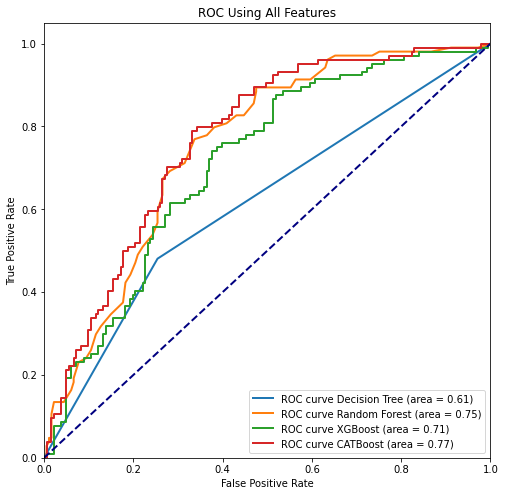

In [80]:
fpr_RFC, tpr_RFC, _ = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
roc_auc_RFC = auc(fpr_RFC, tpr_RFC)
fpr_dtc, tpr_dtc, _ = roc_curve(y_test, dtc.predict_proba(X_test)[:,1])
roc_auc_dtc = auc(fpr_dtc, tpr_dtc)
fpr_XGB, tpr_XGB, _ = roc_curve(y_test, xgb.predict_proba(X_test)[:,1])
roc_auc_XGB = auc(fpr_XGB, tpr_XGB)
fpr_CAT, tpr_CAT, _ = roc_curve(y_test, cb.predict_proba(X_test)[:,1])
roc_auc_CAT = auc(fpr_CAT, tpr_CAT)
plt.figure(figsize=(8,8))
lw = 2
plt.plot(fpr_dtc, tpr_dtc, 
         lw=lw, label='ROC curve Decision Tree (area = %0.2f)' % roc_auc_dtc)
plt.plot(fpr_RFC, tpr_RFC, 
         lw=lw, label='ROC curve Random Forest (area = %0.2f)' % roc_auc_RFC)
plt.plot(fpr_XGB, tpr_XGB, 
         lw=lw, label='ROC curve XGBoost (area = %0.2f)' % roc_auc_XGB)
plt.plot(fpr_CAT, tpr_CAT, 
         lw=lw, label='ROC curve CATBoost (area = %0.2f)' % roc_auc_CAT)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Using All Features')
plt.legend(loc="lower right")
plt.show()